In [8]:
from sklearn.datasets import fetch_california_housing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  

In [10]:
data=fetch_california_housing()
#create a DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df[:7]
# set the target variable
df['target'] = data.target
# print(df.head())
print(df.shape)
X=df.drop(columns=['target'])
y=df['target']

X

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [12]:
#now its time to split the data into training and testig sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(y_test.shape)


(4128,)


In [13]:
#now its time to train the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)




LinearRegression()

In [20]:
X_test[0:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


In [25]:
#now lets check our model by making predictions
y_pred=model.predict(X_test[0:5])
print(y_pred[0])

0.7191228416019158


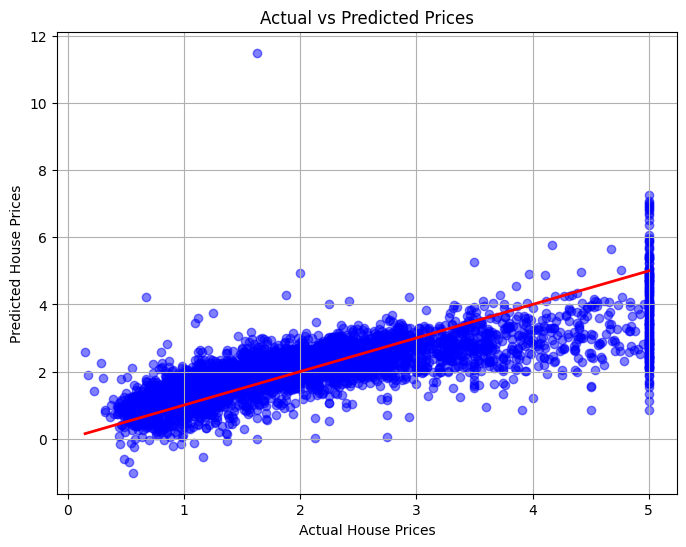

In [15]:
#lets visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

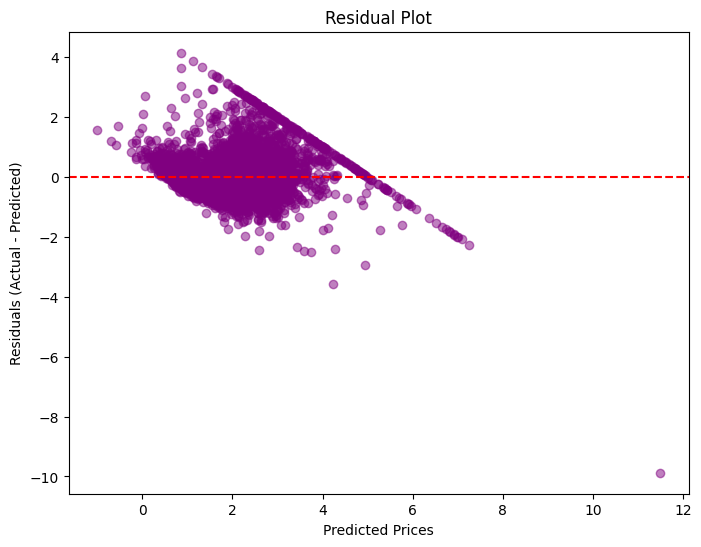

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
# plt.grid(True)
plt.show()


In [17]:
#now lets save the model
import joblib
joblib.dump(model,'california_housing_model.pkl')


['california_housing_model.pkl']